# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#Importing packages to be used 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
import requests
import os 
import seaborn as sns
import re


In [2]:
#Reading the file into a Dataframe
df_Arch = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#A view of the data (Mainly double checking the colunms)
df_Arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
#Verifying the total number of rows in the file.
len(df_Arch)

2356

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
#This is the url to be used to download the tweet image prediction file.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [6]:
response = requests.get(url)

with open("image-predictions.tsv", mode='wb') as file:
        file.write(response.content)

In [7]:
Image_Prediction = pd.read_csv('image-predictions.tsv', sep='\t')

In [8]:
Image_Prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [9]:
import tweepy 
from tweepy import OAuthHandler
from timeit import default_timer as timer

consumer_key = 'CONSUMER KEY'
consumer_secret = 'CONSUMER SECRET'
access_token = 'ACCESS TOKEN'
access_secret = 'ACCESS SECRET'


In [10]:
#Authenticate the API 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)

In [11]:
twet_id = df_Arch.tweet_id.values

In [12]:
len(twet_id)

2356

In [13]:
# Querying Twitter's API for JSON data for each tweet ID in the Twitter archive 
count = 0
fail = {}
# Saving each tweet's returned JSON as a new line in a .txt file
with open('tweets_json.txt', 'w') as file:
    for tweet_id in twet_id:
        count += 1
        print(str(count)+': '+str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print('Success')
            json.dump(tweet._json, file)
            file.write('\n')
        except tweepy.TweepyException as e:
            print('Fail')
            fail[tweet_id] = e
            pass
        

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Rate limit reached. Sleeping for: 710


Success
901: 758740312047005698
Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success


Success
1153: 725786712245440512
Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
1182: 719332531645071360
Success
11

Success
1402: 699434518667751424
Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
1431: 697575480820686848
Success
14

1651: 683515932363329536
Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
1680: 682032003584274432
Success
1681: 6820

Rate limit reached. Sleeping for: 709


Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
18

Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
20

Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
23

In [14]:
#Reading the JSON file into the DataFrame*****
df_tweets = pd.read_json('tweets_json.txt', lines=True)

In [15]:
#Verifying the number of rows 
len(df_tweets)

2327

In [16]:
tweets = []
for line in open('tweets_json.txt', 'r'):
    tweets.append(json.loads(line))


#creating a list of data that is needed from the file
twitter_list = []
for json_data in tweets:
    twitter_list.append({'id': json_data['id'],
                         'retweet_count': int(json_data['retweet_count']),
                         'favorite_count': int(json_data['favorite_count'])})
    


In [17]:
#Create a DataFrame from the list above
df_tweets= pd.DataFrame(twitter_list, columns = ['id', 'retweet_count','favorite_count'])

In [18]:
#A brief view of the first few roles
df_tweets.head()

,id,retweet_count,favorite_count
0,892420643555336193,7006,33807
1,892177421306343426,5301,29328
2,891815181378084864,3479,22047
3,891689557279858688,7225,36934
4,891327558926688256,7758,35270


In [19]:
#Numerical representation of the dataset
df_tweets.describe()

,id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2470.671680,7053.593468
std,6.820795e+16,4184.334868,10960.841234
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,494.500000,1225.000000
50%,7.178418e+17,1148.000000,3051.000000
75%,7.986547e+17,2859.500000,8603.500000
max,8.924206e+17,70725.000000,144767.000000


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [20]:
#Display the Twitter enhanced table to comfirm how far the None values go
df_Arch.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [21]:
#Checking the columns for correct data types and the values in each
df_Arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [22]:
#AVisual view of the value of the None from the Name column
df_Arch.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [23]:
# check for the number of count of the '2' denominator because it as entered corry according to its text colums
df_Arch.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [24]:
#confirming the numerator '1' because of the above issue
df_Arch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [25]:
#Checking for the unique content and count
df_Arch.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [26]:
#check for columns with null values in the archive table
df_Arch.columns[df_Arch.isnull().any()]

Index(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls'],
      dtype='object')

In [27]:
#check for columns for further investigation
df_Arch.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1606,685667379192414208,NaN,NaN,2016-01-09 03:40:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Marty. He has no idea what happened he...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685667379...,9,10,Marty,None,None,pupper,None
1627,684594889858887680,NaN,NaN,2016-01-06 04:38:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""FOR THE LAST TIME I DON'T WANNA PLAY TWISTER ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684594889...,10,10,None,None,None,None,None
1553,688908934925697024,NaN,NaN,2016-01-18 02:21:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Clarence. He does parkour. 8/10 very tale...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688908934...,8,10,Clarence,None,None,None,None
794,773336787167145985,NaN,NaN,2016-09-07 01:47:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Fizz. She thinks love is a...,7.713808e+17,4.196984e+09,2016-09-01 16:14:48 +0000,https://twitter.com/dog_rates/status/771380798...,11,10,Fizz,None,None,None,None
327,833732339549220864,NaN,NaN,2017-02-20 17:37:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rolltidered: This is Gabby. Now requests t...,8.324344e+17,4.466750e+07,2017-02-17 03:39:51 +0000,https://twitter.com/rolltidered/status/8324343...,12,10,Gabby,None,None,None,None
1834,676121918416756736,NaN,NaN,2015-12-13 19:30:01 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here we are witnessing a very excited dog. Cle...,NaN,NaN,NaN,https://vine.co/v/iZXg7VpeDAv,8,10,None,None,None,None,None
1236,712438159032893441,NaN,NaN,2016-03-23 00:37:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kane. He's a semi-submerged Haitian Hu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712438159...,11,10,Kane,None,None,None,None
1811,676819651066732545,NaN,NaN,2015-12-15 17:42:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Watch out Airbud. This pupper is also good at ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676819651...,12,10,None,None,None,pupper,None
1576,687460506001633280,NaN,NaN,2016-01-14 02:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kramer. He's a Picasso Tortellini. Tie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687460506...,10,10,Kramer,None,None,None,None
830,768855141948723200,NaN,NaN,2016-08-25 16:58:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jesse. He really wants a belly rub. Wi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/768855141...,11,10,Jesse,None,None,None,None


In [28]:
#Displaying data for a visual assessment 
Image_Prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
398,673680198160809984,https://pbs.twimg.com/media/CVlkid8WoAAqDlB.jpg,1,Samoyed,0.989853,True,Arctic_fox,0.003344,False,chow,0.002802,True
344,672267570918129665,https://pbs.twimg.com/media/CVRfyZxWUAAFIQR.jpg,1,Irish_terrier,0.716932,True,miniature_pinscher,0.051234,True,Airedale,0.044381,True
2039,884925521741709313,https://pbs.twimg.com/media/DEfjEaNXkAAtPlj.jpg,1,Italian_greyhound,0.259916,True,American_Staffordshire_terrier,0.198451,True,Staffordshire_bullterrier,0.127725,True
1374,762699858130116608,https://pbs.twimg.com/media/CpWnecZWIAAUFwt.jpg,1,kelpie,0.519047,True,German_shepherd,0.296069,True,dingo,0.061005,False
1414,771014301343748096,https://pbs.twimg.com/media/CrMxZzgWIAQUxzx.jpg,1,meerkat,0.202335,False,doormat,0.111790,False,macaque,0.088925,False


In [29]:
#checking for datatypes and missing values
Image_Prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
#brief look of the table
df_tweets.head(5)

,id,retweet_count,favorite_count
0,892420643555336193,7006,33807
1,892177421306343426,5301,29328
2,891815181378084864,3479,22047
3,891689557279858688,7225,36934
4,891327558926688256,7758,35270


In [31]:
#checik for data type and missing values
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


### Quality issues
1.Numerator and denomenator ratings of 1 & 2 respectively are incorrect according to the comment in the text 

2.Removing of additional 0000 values in the timestamp colum

3.Inaccurate name for dogs named example None and a in the Archive file

4.Inaccurate data in the name column where 745 of its values is None.

5.Changing the url in the source column to a more clearer definition

6.Inaccurate data type for timestamp column

7.The img_num column to be removed as its not needed

8.Removing retweets from the achives table



### Tidiness issues
1.The dog stages can be put in one columns instead of seperated


2.Twitter Archives table and Twitter API should be in one table 



## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [32]:
# Make copies of original pieces of data
df_Arch_clean = df_Arch.copy()
Image_Prediction_clean = Image_Prediction.copy()
df_tweets_clean = df_tweets.copy


### Removing tweets with RT or retweet id

#### Define: Replacing values with Rt or retweet id with 0 and then dropping them

#### Code

In [33]:
#Remove/ drop any tweet with RT or retweet id by 
drop1 = df_Arch_clean[pd.notnull(df_Arch_clean['retweeted_status_id'])].index
drop2 = df_Arch_clean[pd.notnull(df_Arch_clean['in_reply_to_status_id'])].index

df_Arch_clean.drop(index=drop1, inplace=True)
df_Arch_clean.drop(index=drop2, inplace=True)

In [34]:
df_Arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [35]:
df_Arch_clean.drop(["in_reply_to_status_id",
                    "in_reply_to_user_id",
                    "retweeted_status_id",
                    "retweeted_status_user_id",
                   "retweeted_status_timestamp"], axis=1, inplace=True)

#### Test 

In [36]:
df_Arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Unwanted values attached to timestamps values

#### Stripping the timestamp values of the 0000

#### Code


In [37]:
#Taking out the +0000 that is attached to the timestamp
df_Arch_clean.timestamp = df_Arch_clean.timestamp.str[:-5].str.strip()

#### Test

In [38]:
df_Arch_clean.timestamp.head(5)

0    2017-08-01 16:23:56
1    2017-08-01 00:17:27
2    2017-07-31 00:18:03
3    2017-07-30 15:58:51
4    2017-07-29 16:00:24
Name: timestamp, dtype: object

### Img column not needed in the table

#### Dropping the img_num column from the Prediction table 

#### Code

In [39]:
#Removing img number as it is not really needed
Image_Prediction_clean.drop('img_num', axis=1, inplace=True)

#### Test

In [40]:
Image_Prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   p1        2075 non-null   object 
 3   p1_conf   2075 non-null   float64
 4   p1_dog    2075 non-null   bool   
 5   p2        2075 non-null   object 
 6   p2_conf   2075 non-null   float64
 7   p2_dog    2075 non-null   bool   
 8   p3        2075 non-null   object 
 9   p3_conf   2075 non-null   float64
 10  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.9+ KB


### Incorrect Data type


#### Change the data type of the timestamp from int to datetime

#### Code

In [41]:
#Changing data type of the timestamp from object to datetime 
df_Arch_clean['timestamp'] = pd.to_datetime(df_Arch_clean['timestamp'])

##### Test

In [42]:
df_Arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   expanded_urls       2094 non-null   object        
 5   rating_numerator    2097 non-null   int64         
 6   rating_denominator  2097 non-null   int64         
 7   name                2097 non-null   object        
 8   doggo               2097 non-null   object        
 9   floofer             2097 non-null   object        
 10  pupper              2097 non-null   object        
 11  puppo               2097 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


### Inaccurate values

#### Replacing None and a in the name columns with null values

#### Code

In [43]:
#Changing the values of 'a' and 'None' in the name colmn to Nan because they are not accurate 
df_Arch_clean.name.replace(['None', 'a'],np.nan, inplace=True)

##### Test

In [44]:
df_Arch_clean.name.value_counts()

Lucy          11
Charlie       11
Oliver        10
Cooper        10
Tucker         9
              ..
Wishes         1
Rose           1
Theo           1
Fido           1
Christoper     1
Name: name, Length: 953, dtype: int64

### Changing the entries in the source column


#### Replacing the content of the source column to make them more concise

#### Code

In [45]:
#Changing url in source column to something more clearer like a category indicating where tweets were made from
#From this category
old_list = ['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
           '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
           '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
           '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']
#To this category
new_list = ['Twitter for iphone','Vine','Twitter Web client','TweetDeck']

In [46]:
[df_Arch_clean.source.replace(old_list, new_list, inplace=True) for current_list, fresh_list in zip(old_list,new_list)];

#### Test

In [47]:
df_Arch_clean.source.sample(5)

329     Twitter for iphone
495     Twitter for iphone
1134    Twitter for iphone
45      Twitter for iphone
2215    Twitter for iphone
Name: source, dtype: object

###  Incorrect data entry in the numerator and denominator tables

#### Replacing the the incorrect value with the correct values obtain from the text column

#### Code

In [48]:
#Changing the values for 2 and 7 to 9 and Null respectively for the rating_denominator as wrong value was used
df_Arch_clean['rating_numerator'] = df_Arch_clean['rating_numerator'].replace([ 1], 9)
df_Arch_clean['rating_denominator'] = df_Arch_clean['rating_denominator'].replace([ 2], 10)

#### Test

In [49]:
df_Arch_clean.rating_denominator.value_counts()

10     2081
50        3
11        2
80        2
70        1
7         1
150       1
170       1
20        1
90        1
40        1
110       1
120       1
Name: rating_denominator, dtype: int64

### The expanding urls column not needed

#### Dropping the expanded_urls columns from the Archive table 

#### Code

In [50]:
#Remove /drop the expanded url because they will not be need in the analysis
df_Arch_clean.drop('expanded_urls', axis=1, inplace=True)

#### Test

In [51]:
df_Arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   rating_numerator    2097 non-null   int64         
 5   rating_denominator  2097 non-null   int64         
 6   name                1439 non-null   object        
 7   doggo               2097 non-null   object        
 8   floofer             2097 non-null   object        
 9   pupper              2097 non-null   object        
 10  puppo               2097 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 196.6+ KB


### The four variables in the Archives table need to be in one table

#### Concatenate the four columns into a new column and then stripping the column of the None values to obtain the entry for each tweet

#### Code

In [52]:
#Merging columns into a single column seperated by a whitespace
df_Arch_clean['dogstage'] = df_Arch_clean[['doggo','floofer','pupper','puppo']].agg(' '.join, axis=1)

In [53]:
df_Arch_clean['dogstage'] = df_Arch_clean['dogstage'].str.extract('(doggo|pupper|floofer|puppo)', expand=True)

In [54]:
#Dropping the old columns
df_Arch_clean.drop(columns=['doggo','floofer','pupper','puppo'],axis=1, inplace=True)

#### Test

In [55]:
df_Arch_clean.dogstage.value_counts()

pupper     221
doggo       83
puppo       23
floofer      9
Name: dogstage, dtype: int64

In [56]:
df_Arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   rating_numerator    2097 non-null   int64         
 5   rating_denominator  2097 non-null   int64         
 6   name                1439 non-null   object        
 7   dogstage            336 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 147.4+ KB


### Tweet API needs to be added to the Archives table

#### Merging the Archives table and the Tweet API table and joining it on tweet_id and id

#### Code

In [57]:
#Putting the Archived tweets and the Twitter API in one table 
df_Arch_clean = pd.merge(df_Arch_clean, df_tweets, 
                         left_on='tweet_id',right_on='id', how='left')


In [58]:
df_Arch_clean.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dogstage,id,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iphone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,8.924206e+17,7006.0,33807.0


In [59]:
#Dropping column that will not be needed in the merged table
df_Arch_clean.drop('id',axis=1, inplace=True)

In [60]:
df_Arch_clean.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dogstage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iphone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,7006.0,33807.0


In [61]:
#Adding only jpg from the Image Prediction table to the merged table
df_Arch_clean = df_Arch_clean.merge(Image_Prediction, on='tweet_id', how='left')

In [62]:
df_Arch_clean.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dogstage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iphone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,7006.0,33807.0,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


### Dropping columns that are not relevant 

#### Removing columns that were in the Image prediction page using the drop()

#### Code

In [63]:
#Removing any unwanted column after the merge
df_Arch_clean.drop(columns=['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1, inplace=True)

#### Test

In [64]:
#A look at our merged table with all the columns
df_Arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   rating_numerator    2097 non-null   int64         
 5   rating_denominator  2097 non-null   int64         
 6   name                1439 non-null   object        
 7   dogstage            336 non-null    object        
 8   retweet_count       2089 non-null   float64       
 9   favorite_count      2089 non-null   float64       
 10  jpg_url             1971 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 196.6+ KB


### Assign correct data type to data 

#### Change the data types to appropriate types

#### code

In [65]:
 # Convert nan/null to 0 in order to effect the data type change
df_Arch_clean['retweet_count'] = df_Arch_clean['retweet_count'].fillna(0)
df_Arch_clean['retweet_count'] = df_Arch_clean['retweet_count'].astype(int)

df_Arch_clean['favorite_count'] = df_Arch_clean['favorite_count'].fillna(0) 
df_Arch_clean['favorite_count'] = df_Arch_clean['favorite_count'].astype(int)



####  Realised the retweet and favorite counts are missing some values

In [66]:
#dropping the nulls values in the two columns
df_Arch_clean.dropna(subset = ['retweet_count','favorite_count'], inplace=True)

#### Test

In [67]:
df_Arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   rating_numerator    2097 non-null   int64         
 5   rating_denominator  2097 non-null   int64         
 6   name                1439 non-null   object        
 7   dogstage            336 non-null    object        
 8   retweet_count       2097 non-null   int32         
 9   favorite_count      2097 non-null   int32         
 10  jpg_url             1971 non-null   object        
dtypes: datetime64[ns](1), int32(2), int64(3), object(5)
memory usage: 180.2+ KB


In [68]:
# view of the final dataset
df_Arch_clean.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dogstage,retweet_count,favorite_count,jpg_url
0,892420643555336193,2017-08-01 16:23:56,Twitter for iphone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,7006,33807,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg


In [69]:
df_Arch_clean.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count
count,2.097000e+03,2097.000000,2097.000000,2097.000000,2097.000000
mean,7.365594e+17,12.208393,10.452551,2295.519313,7749.450167
std,6.710178e+16,40.361593,6.642505,4033.757480,11317.718892
min,6.660209e+17,0.000000,7.000000,0.000000,0.000000
25%,6.768197e+17,10.000000,10.000000,503.000000,1707.000000
50%,7.098528e+17,11.000000,10.000000,1107.000000,3521.000000
75%,7.877176e+17,12.000000,10.000000,2619.000000,9646.000000
max,8.924206e+17,1776.000000,170.000000,70725.000000,144767.000000


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [70]:
#Saving the merged file as a csv file
df_Arch_clean.to_csv('twitter_archive_master.csv', encoding='utf-8',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [71]:
#Packages used for the Analyses and visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import seaborn as sns

In [72]:
#load cleaned dataset in Dataframe
df = pd.read_csv('twitter_archive_master.csv')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   rating_numerator    2097 non-null   int64 
 5   rating_denominator  2097 non-null   int64 
 6   name                1439 non-null   object
 7   dogstage            336 non-null    object
 8   retweet_count       2097 non-null   int64 
 9   favorite_count      2097 non-null   int64 
 10  jpg_url             1971 non-null   object
dtypes: int64(5), object(6)
memory usage: 180.3+ KB


### Insights:
1.Quite noticeably you can see post or picture that are not Dog and it can easily be identified in the text when the 'We rate Dogs' user comments that 'We only rate Dogs'on a post.

2.Most tweets were made from iphone but that can be debatable because there was no mention of androids

3.Majority of the retweeted and liked tweets belong to the Pupper dogstage followed by doggo and then the puppo 

4.There is a relationship between retweet and favorite more importantly a positive relationship

### Visualization

### Could ratings have an influence on retweets and favorites ?


In [75]:
#correlation between the three variables
corre = df[['rating_numerator','retweet_count','favorite_count']].corr()
corre

,rating_numerator,retweet_count,favorite_count
rating_numerator,1.000000,0.019014,0.016945
retweet_count,0.019014,1.000000,0.925992
favorite_count,0.016945,0.925992,1.000000


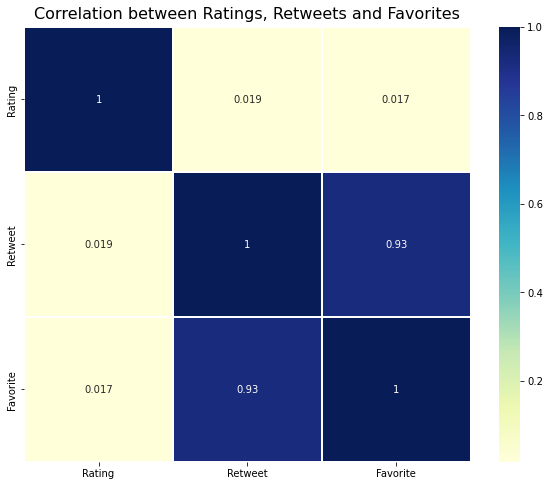

In [77]:
# HeatMap Visualisation

plt.figure(figsize=(10,8))
labels = ['Rating','Retweet','Favorite']
sns.heatmap(corre, xticklabels=labels, yticklabels=labels, annot=True,linewidths=0.4,cmap="YlGnBu")
plt.title('Correlation between Ratings, Retweets and Favorites', fontsize=16, pad=8);

Ratings appear to have less of an impact on Retweet and Favorite.

### Is there a relationship between retweet and favorite ?


In [78]:
#Lets find the correlation first
correl = df[['retweet_count', 'favorite_count']].corr()
correl

,retweet_count,favorite_count
retweet_count,1.000000,0.925992
favorite_count,0.925992,1.000000


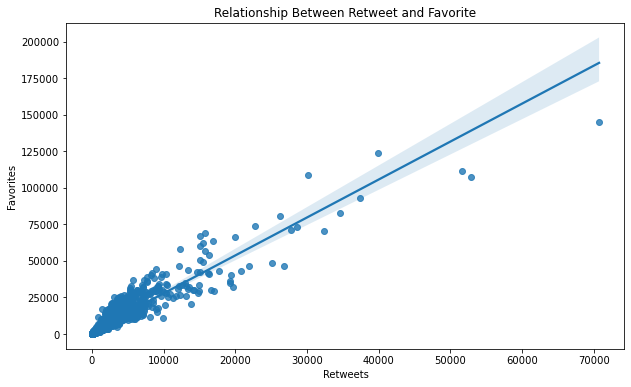

In [79]:
plt.figure(figsize=(10,6))
sns.regplot(x=df.retweet_count, y=df.favorite_count)
plt.title('Relationship Between Retweet and Favorite')
plt.xlabel('Retweets')
plt.ylabel('Favorites');

Plot skewed to the right indicating a relationship 

### Bar chart Representation Of Top Five Names

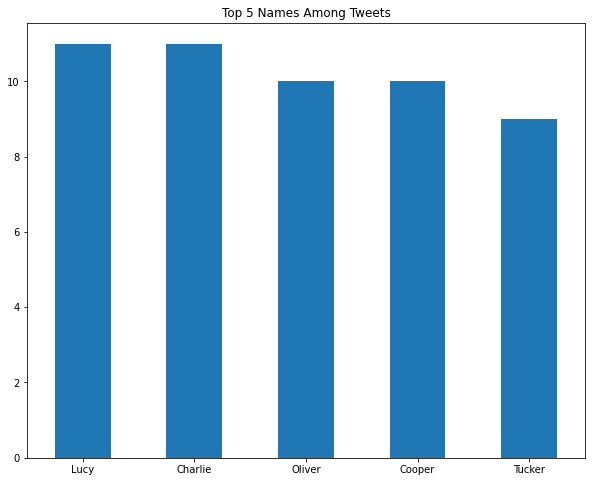

In [80]:

df['name'].value_counts()[:5].plot(kind='bar', figsize=(10,8),
                                               x='name',
                                               y='count',
                                               rot='0',
                                               title='Top 5 Names Among Tweets');

Commonly used names for dog acccording to the "we Rate Dog " account on twitter . It seems Lucy and Charlie are closing on eachother.This gives a view of some of the most common names present in the dataset that is by show of count 

### Sum Of Retweeted Posts By Dogstage

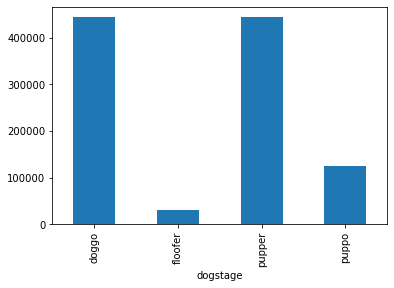

In [81]:
#Find the sum of the retweets for dogstage
df.groupby(['dogstage'])['retweet_count'].sum().plot(kind='bar')
plt.show()

### Sum of the Liked Tweets Per Dogstage

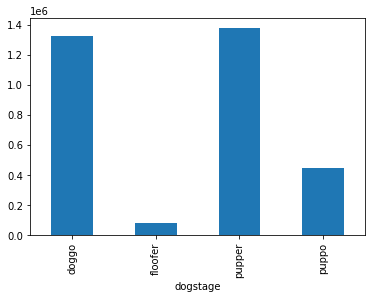

In [82]:
df.groupby(['dogstage'])['favorite_count'].sum().plot(kind='bar')
plt.show()

In [83]:
#The Most like tweeet /post
df[df['favorite_count']==df['favorite_count'].max()]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dogstage,retweet_count,favorite_count,jpg_url
825,744234799360020481,2016-06-18 18:26:18,Twitter for iphone,Here's a doggo realizing you can stand in a po...,13,10,NaN,doggo,70725,144767,https://pbs.twimg.com/ext_tw_video_thumb/74423...


### Limitation

 My analysis and conclusion is based on my wrangled dataset .

RESOURCES USED 

https://pythontic.com/pandas/dataframe-plotting/bar%20chart

https://www.geeksforgeeks.org/display-the-pandas-dataframe-in-heatmap-style/

https://python.plainenglish.io/making-plots-with-the-pandas-groupby-ac492941af28

https://vitalflux.com/correlation-heatmap-with-seaborn-pandas/



